$\textbf{Taller 3 Metodos Computacionales 2}$

$\textbf{Punto 1) Carros en un plano inclinado}$

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp

plt.rcParams["axes.labelsize"] = 15
plt.rcParams["figure.figsize"] = (14,5)
plt.rcParams["animation.html"] = "jshtml"

In [8]:
gtierra=9.8
gamma=0.7
theta=30

def sistema(t,Y,gam,ang,g,m):
    x,v=Y
    return np.array([v,-g+g*np.cos(ang)-(gam/m)*v**2])

def stop(t,Y,gam,ang,g,m):
    x,y = Y
    return x
stop.terminal = True
stop.direction = -1

masas=np.linspace(1,20,20)

y0=np.array([10,0])

args=np.zeros((len(masas),4))
    
for i in range(len(masas)):
    args[i][0]=gamma
    args[i][1]=theta
    args[i][2]=gtierra
    args[i][3]=masas[i]

tfs=np.zeros(len(masas))

t_span=(0,10)

In [9]:
for j in range(len(masas)):
    sols= solve_ivp(fun=sistema,
                    y0=y0,
                    t_span=t_span,
                    args=args[j],
                    events=stop,
                    dense_output=True 
                    )
    tfs[j]=float(sols.t_events[0])



Text(0, 0.5, 'tiempo')

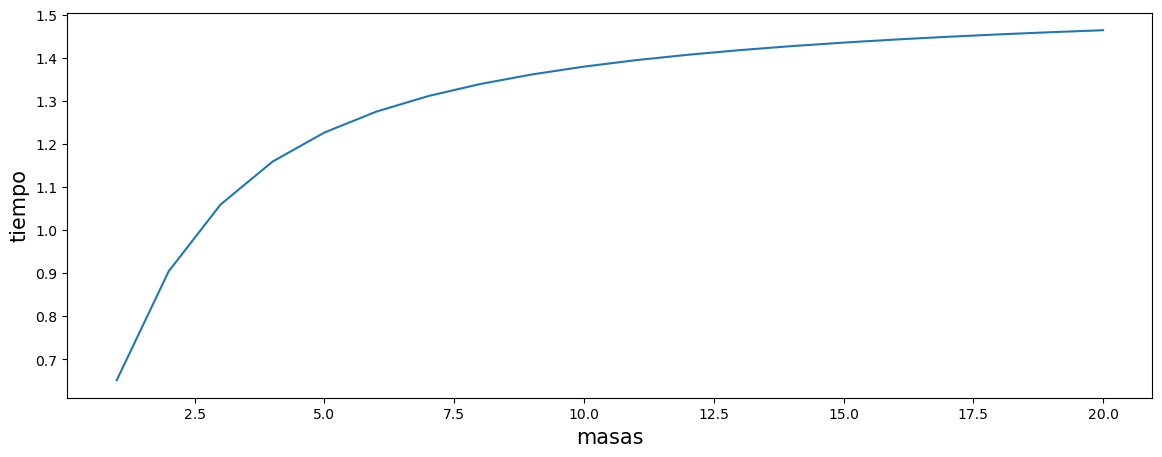

In [10]:
plt.plot(masas,tfs)
plt.xlabel("masas")
plt.ylabel("tiempo")

$\textbf{Punto 2) Comprobación observacional de la relatividad general}$ 

$\textbf{2.1 y extra}$

In [11]:
def func2(t,Y,mu,alf):
    x2,y2,vx2,vy2 = Y
    
    r=np.array([x2,y2])
    r_mag=np.linalg.norm(r)
    r_unit=r/r_mag
    
    acel=-(mu/r_mag**2)*(1+alf/r_mag**2)*r_unit
    
    return np.array([vx2, vy2,acel[0],acel[1]])

alpha2_1=1.09778201e-2
miu=39.4234021
args2_1=(miu,alpha2_1)

t_span=(0.,1.5)

a= 0.38709893
e= 0.20563069
x0=a*(1+e)
vy0=np.sqrt((miu/a)*(1-e)/(1+e))

Y0=np.array([x0,0,0,vy0])

In [12]:
sol = solve_ivp(
    func2,
    t_span,
    Y0,
    args=args2_1,
    max_step=0.01,
    dense_output=True,
)


In [13]:
t_dense = np.linspace(sol.t[0],sol.t[-2],300)
# interpolación
Y_dense = sol.sol(t_dense)
x_dense,y_dense,vx_dense,vy_dense = Y_dense

In [14]:
#Ya esta la animacion en video en la carpeta de github
"""
fig = plt.figure();
plt.xlim(x_dense.min()-0.15,x_dense.max()+0.15)
plt.ylim(y_dense.min()-0.15,y_dense.max()+0.15)


point = plt.scatter(*Y0[:2])
line = plt.plot(*Y0[:2])[0]

def func(frame):

    point.set_offsets(Y_dense[:2,frame])

    if frame>1:
        line.set_data(x_dense[:frame+1],y_dense[:frame+1])
    return point,line

anim = animation.FuncAnimation(fig,func,frames=range(0,len(t_dense),10),interval=10)
"""
#anim.save('animacion3_2.mp4', writer='ffmpeg', fps=30)



'\nfig = plt.figure();\nplt.xlim(x_dense.min()-0.15,x_dense.max()+0.15)\nplt.ylim(y_dense.min()-0.15,y_dense.max()+0.15)\n\n\npoint = plt.scatter(*Y0[:2])\nline = plt.plot(*Y0[:2])[0]\n\ndef func(frame):\n\n    point.set_offsets(Y_dense[:2,frame])\n\n    if frame>1:\n        line.set_data(x_dense[:frame+1],y_dense[:frame+1])\n    return point,line\n\nanim = animation.FuncAnimation(fig,func,frames=range(0,len(t_dense),10),interval=10)\n'

Al cambiar la magnitud de $\alpha$ de $10^{-8}$ a $10^{-2}$, es mas evidente el efecto relativista, y la orbita se desplaza mucho mas por ciclo completado.

$\textbf{2.2}$

In [15]:
def evento(t,Y,mu,alf):
    x2,y2,vx2,vy2 = Y
    r_v=x2*vx2+y2*vy2
    return r_v

evento.direction=0

t_span2_2=(0.,10)

alpha2_2=1.09778201e-8
miu=39.4234021
args2_2=(miu,alpha2_2)


sol2 = solve_ivp(
    func2,
    t_span2_2,
    Y0,
    args=args2_2,
    events=evento,
    max_step=0.001,
)

Y2_2=sol2.y_events[0]

In [16]:
num_afelios=len(Y2_2)

afelios=np.zeros(num_afelios)

for s in range(num_afelios):
    afelios[s]=np.arctan2(Y2_2[s][1],Y2_2[s][0])
    

for m in range(len(afelios)):
    ang=afelios[m]
    sig=np.sign(ang)
    difpi=np.abs(np.pi-np.abs(ang))
    dif2pi=np.abs(2*np.pi-np.abs(ang))
    dif0=np.abs(ang)
    if (difpi<dif2pi) and (difpi<dif0):
        ang= np.abs(ang)-np.pi
    if (dif2pi<difpi) and (dif2pi<dif0):
        ang= np.abs(ang)-2*np.pi
    afelios[m]=np.abs(ang)


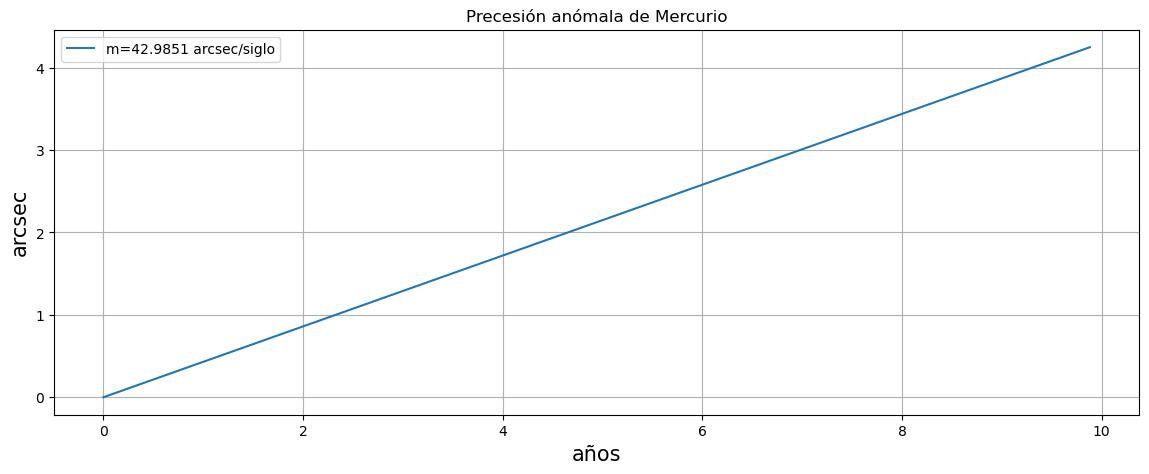

In [17]:
temp_eve=sol2.t_events[0]

afelios_arc=afelios*(180/np.pi)*3600

mpen=(afelios_arc[10]-afelios_arc[5])/(temp_eve[10]-temp_eve[5])*100

plt.plot(temp_eve,afelios_arc,label="m="+str(round(mpen,4))+" arcsec/siglo")
plt.xlabel("años")
plt.ylabel("arcsec")
plt.grid(True)
plt.title('Precesión anómala de Mercurio')
plt.legend()
plt.show()

la pendiente obtenida fue muy similar a la esperada de m=42.9799 arcsec / siglo,

$\textbf{Punto 3) Cuantización de la energía}$ 

In [18]:
def sistema3(t,Y,E):
    y1,y2=Y
    return(y2,y1*(t**2-2*E))

t_span3=(0,6)
y0_sim=np.array([1,0])
y0_antisim=np.array([0,1])

In [19]:
vals_E_sim=np.linspace(2,11,4000)
vals_sim=np.zeros(len(vals_E_sim))
for k in range(len(vals_E_sim)):
    sol3sim=solve_ivp(fun=sistema3,
                    y0=y0_sim,
                    t_span=t_span3,
                    args=(vals_E_sim[k],),
                    max_step=1)
    vals_sim[k]=np.sqrt(sol3sim.y[0][-1]**2+sol3sim.y[1][-1]**2)


([<matplotlib.axis.XTick at 0x298b11d3910>,
 [Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5'),
  Text(10.0, 0, '10.0'),
  Text(10.5, 0, '10.5')])

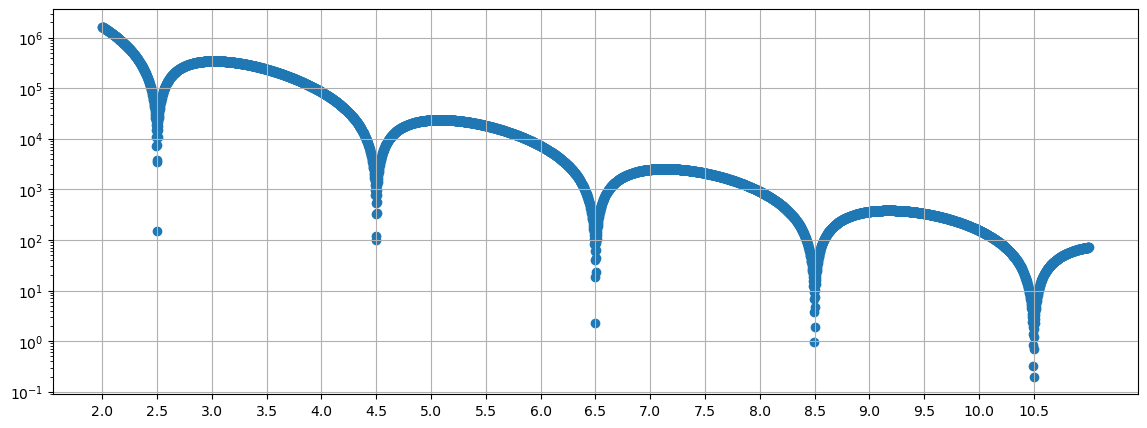

In [20]:
plt.scatter(vals_E_sim,vals_sim)
plt.yscale("log")
plt.grid(True)
plt.xticks(np.arange(2, 11, 0.5))

Se puede observar que en los valores de energia de E={2.5 , 4.5 , 6.5 , 8.5 , 10.5} hay una clara caida del valor de $\sqrt{f(6)^2+f'(6)^2}$ para el caso simetrico 

In [21]:
vals_E_antisim=np.linspace(1,10,4000)
vals_antisim=np.zeros(len(vals_E_antisim))
for f in range(len(vals_E_antisim)):
    sol3antisim=solve_ivp(fun=sistema3,
                    y0=y0_antisim,
                    t_span=t_span3,
                    args=(vals_E_antisim[f],),
                    max_step=1)
    vals_antisim[f]=np.sqrt(sol3antisim.y[0][-1]**2+sol3antisim.y[1][-1]**2)

([<matplotlib.axis.XTick at 0x298b1407790>,
 [Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5')])

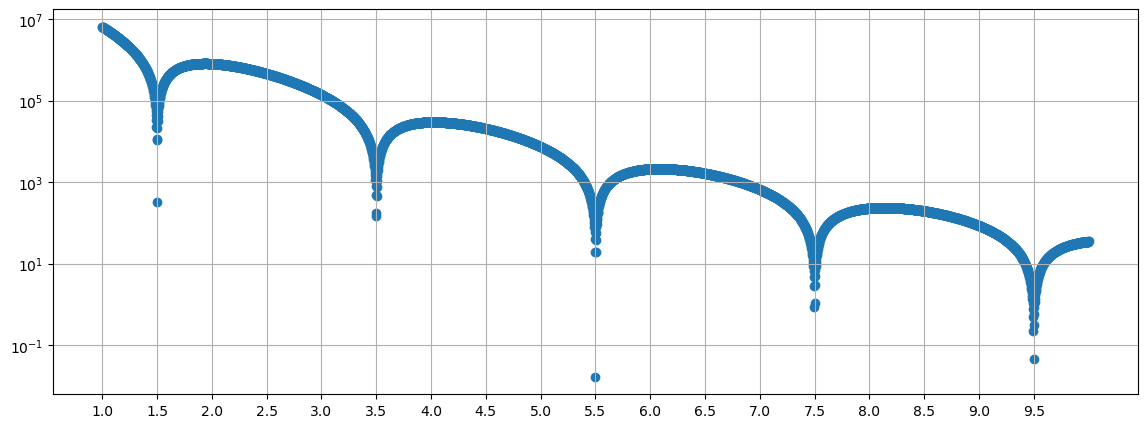

In [22]:
plt.scatter(vals_E_antisim,vals_antisim)
plt.yscale("log")
plt.grid(True)
plt.xticks(np.arange(1, 10, 0.5))

Por otro lado, Se puede apreciar que para el caso antisimetrico, los valores de energia en donde caida del valor de $\sqrt{f(6)^2+f'(6)^2}$ son E={1.5 , 3.5 , 4.5 , 7.5 , 9.5}.